In [22]:
pip install pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('BTCDB.csv')


In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.set_index('timestamp', inplace=True) 

In [25]:
initial_cash = 10000
position =0
cash = initial_cash
protfolio_value = []
trade_log = []  


In [26]:
for i in range(1, len(df)):
    row = df.iloc[i]
    prev_row = df.iloc[i-1]

    sentiment = row['Fear & Greed Classification']
    price = row['close']
    timestamp = row.name

    if sentiment in ['Extreme Fear','Fear'] and position == 0:
        
        position = cash / price
        cash = 0
        trade_log.append((timestamp,'BUY', price, sentiment))

    elif sentiment in ['Greed','Extreme Greed'] and position > 0:
        cash = position * price
        position = 0
        trade_log.append((timestamp, 'SELL', price, sentiment))

    value = cash + position * price
    protfolio_value.append((timestamp, value))


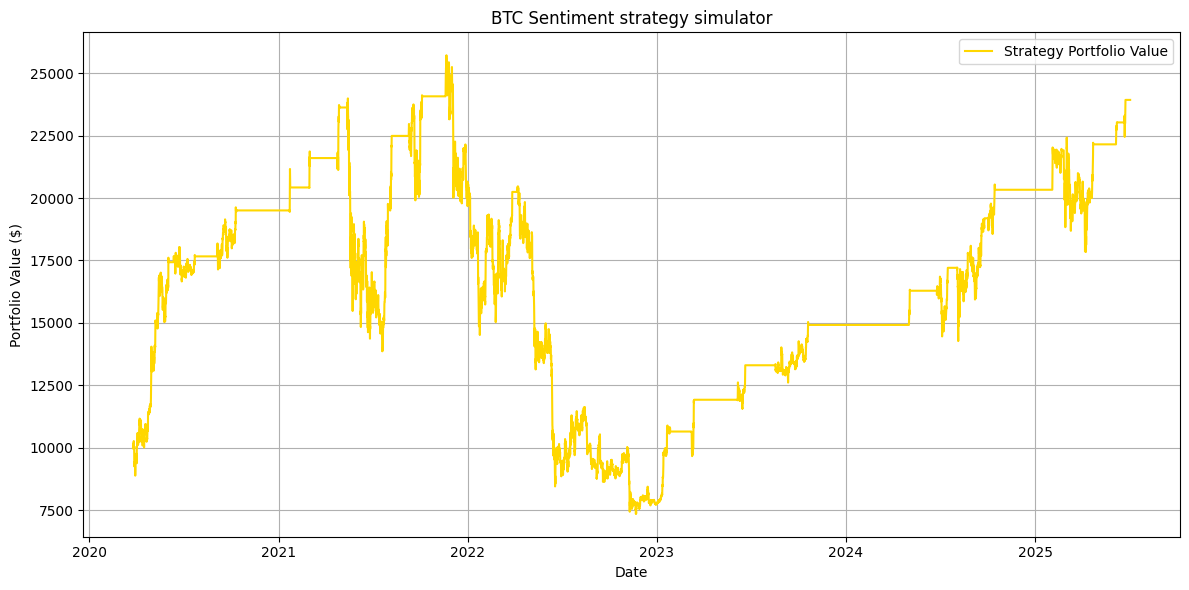

In [27]:
portfolio_df = pd.DataFrame(protfolio_value, columns=['timestamp', 'value'])
portfolio_df.set_index('timestamp', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['value'], label='Strategy Portfolio Value', color='gold')
plt.title('BTC Sentiment strategy simulator')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
trades = pd.DataFrame(trade_log, columns=['Date', 'Action', 'Price', 'Sentiment'])
trades.to_csv('trades_log.csv', index=False)

In [29]:
final_price = df.iloc[-1]['close']
final_value = cash + position * final_price

print(f"Initial Capital: ${initial_cash:.2f}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Trades Executed: {len(trade_log)}")

Initial Capital: $10000.00
Final Portfolio Value: $23931.41
Total Trades Executed: 50
